<a href="https://colab.research.google.com/github/Thanmayeedindugala25/Excelr-NLP/blob/main/Exploratory_Data_Analysis_25_1_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [6]:
def ratings(rating):
  if rating>3 and rating<=5:
    return "Positive"
  else:
    return "Negative"

In [7]:
df['Rating'] = df["Rating"].apply(ratings)

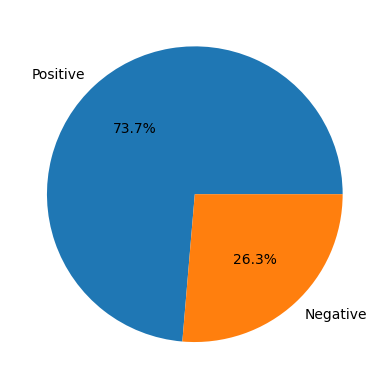

In [8]:
plt.pie(df['Rating'].value_counts(),
        labels = df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

**Character count**

In [9]:
length = len(df['Review'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 593


In [10]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


**Word Count**

In [11]:
word_count = df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [12]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [13]:
df['Word_count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [14]:
import nltk
from nltk import tokenize
nltk.download('punkt_tab')
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


591.0

In [15]:
df['mean_word_length'] = df['Review'].apply(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [16]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

591.0

In [23]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+','', review)
  review = "".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating,Length,Word_count,mean_word_length,Review_lists
0,nicehotelexpensiveparkinggotgooddealstayhotela...,Positive,593,87,5.804598,"[nice, hotel, expensive, parking, got, good, d..."
1,oknothingspecialchargediamondmemberhiltondecid...,Negative,1689,250,5.752000,"[ok, nothing, special, charge, diamond, member..."
2,nicerooms4experiencehotelmonacoseattlegoodhote...,Negative,1427,217,5.571429,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,uniquegreatstaywonderfultimehotelmonacolocatio...,Positive,600,89,5.730337,"[unique,, great, stay,, wonderful, time, hotel..."
4,greatstaygreatstaywentseahawkgameawesomedownfa...,Positive,1281,191,5.701571,"[great, stay, great, stay,, went, seahawk, gam..."


In [27]:
def corpus(text):
  text = text.split()
  return text

In [29]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Length,Word_count,mean_word_length,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571,"[great, stay, great, stay,, went, seahawk, gam..."


In [31]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0],ncols=150,nrows =10, colour='green',smoothing=0.8):
  corpus += df['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 100350.50it/s]


2138765

In [32]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [33]:
words = []
freq = []
for word, count in mostCommon:
  words.append(word)
  freq.append(count)

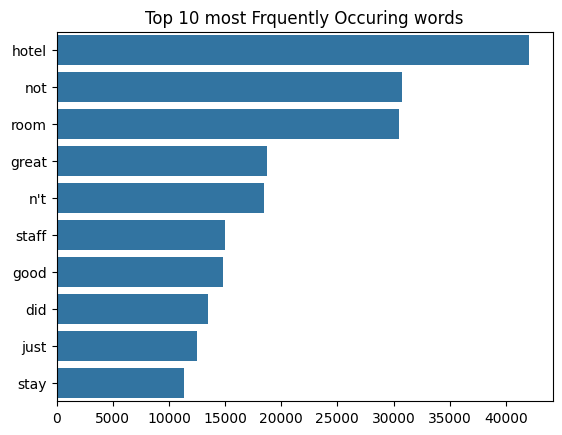

In [34]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 10 most Frquently Occuring words')
plt.show()